<a href="https://colab.research.google.com/github/04-AhmadThariqRamadhan/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AHMAD THARIQ RAMADHAN / 02 / 2041720200 / TI-3B

In [10]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Object Detection

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv_imshow
from PIL import Image as im

##Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

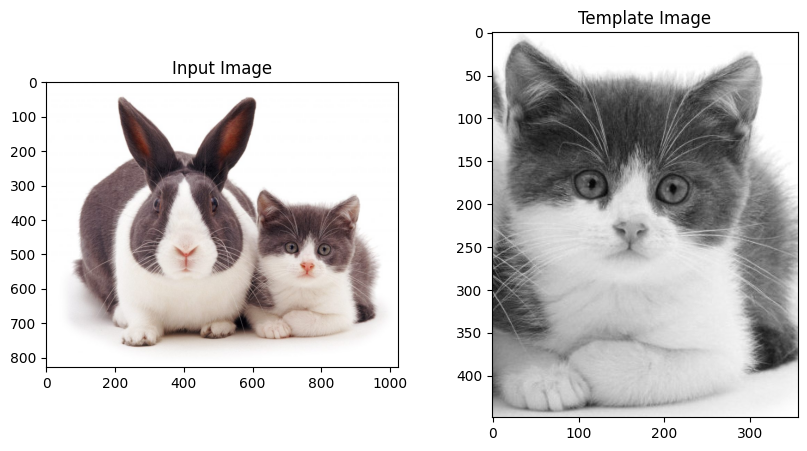

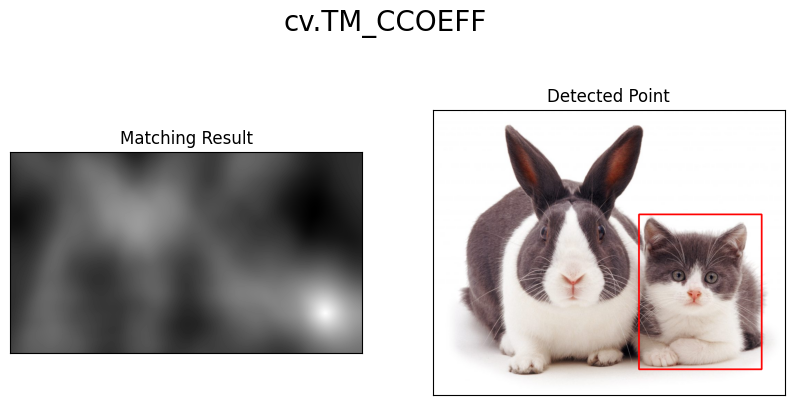

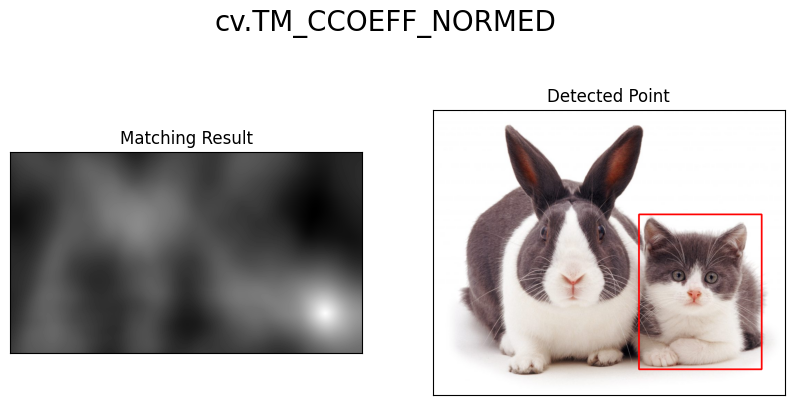

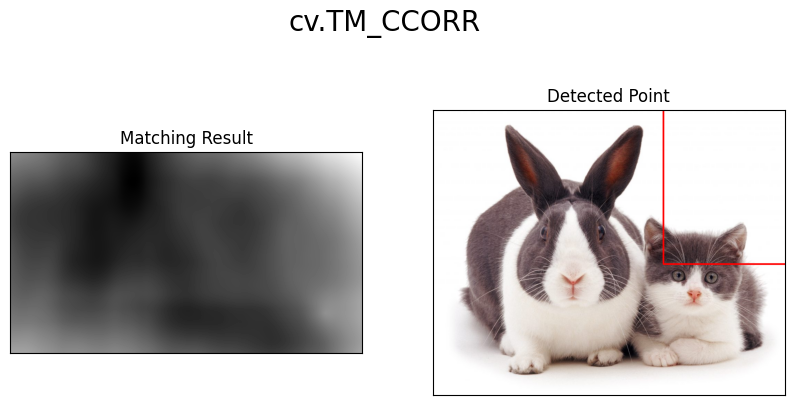

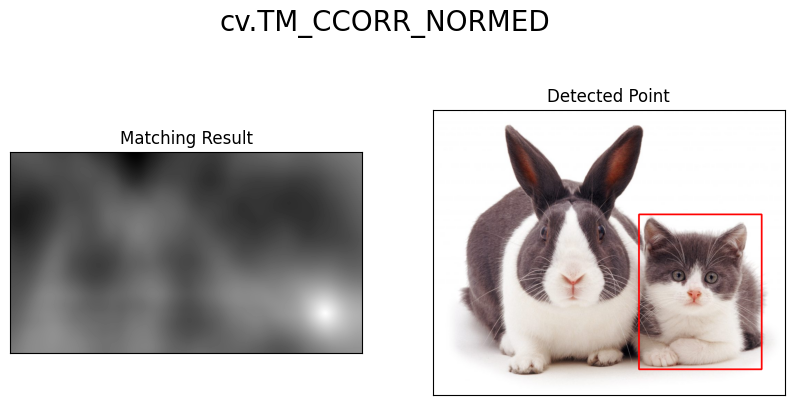

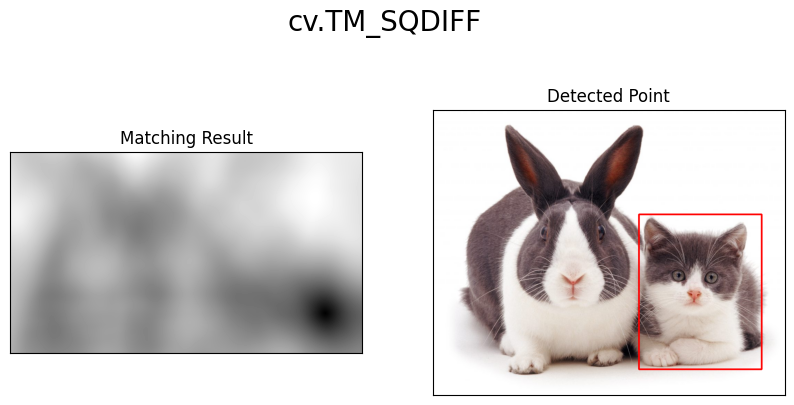

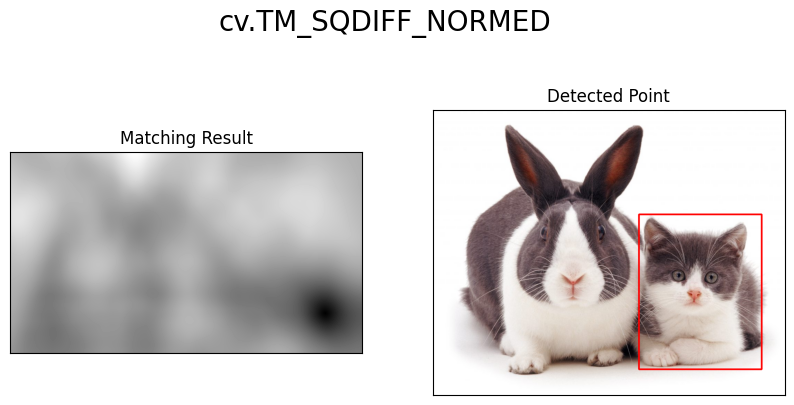

In [4]:
gambar = cv.imread('/content/drive/MyDrive/images/Object Detection/cats_and_bunnies.jpg')
gambar_gray = cv.cvtColor(gambar, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drive/MyDrive/images/Object Detection/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

gambar2 = gambar.copy()
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(cv.cvtColor(gambar, cv.COLOR_BGR2RGB))
axarr[0].set_title("Input Image")
axarr[1].imshow(template, cmap='gray')
axarr[1].set_title("Template Image")

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    gambar = gambar2.copy()
    method = eval(meth)

    res = cv.matchTemplate(gambar_gray, template, method)

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(gambar, top_left, bottom_right, (0, 0, 255), 3)

    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(gambar, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)
    plt.show()

##Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template.

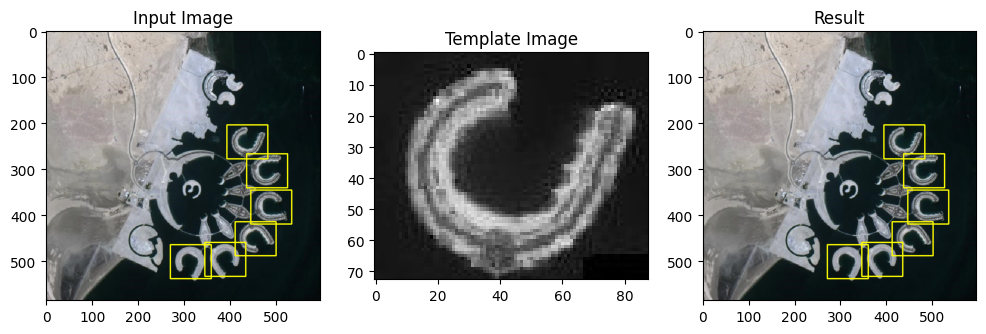

In [5]:
gambar3 = cv.imread('/content/drive/MyDrive/images/Object Detection/bahrain.jpg', cv.IMREAD_COLOR)
template2 = cv.imread('/content/drive/MyDrive/images/Object Detection/bahrain-template.jpg', cv.IMREAD_COLOR)
template_gray = cv.cvtColor(template2, cv.COLOR_BGR2GRAY)

method = cv.TM_CCOEFF_NORMED
threshold = 0.4

res = cv.matchTemplate(gambar3, template2, method)

while True:
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if max_val < threshold:
        break

    h, w = template2.shape[:2]
    cv.rectangle(gambar3, max_loc, (max_loc[0]+w+1, max_loc[1]+h+1), (0, 255, 255), 2)

    start_row, end_row, start_col, end_col = max_loc[1]-h//2, max_loc[1]+h//2+1, max_loc[0]-w//2, max_loc[0]+w//2+1
    res[start_row:end_row, start_col:end_col] = 0

gambar3_rgb = cv.cvtColor(gambar3, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(cv.cvtColor(gambar3, cv.COLOR_BGR2RGB))
ax[0].set_title('Input Image')
ax[0].axis('on')

ax[1].imshow(template_gray, cmap='gray')
ax[1].set_title('Template Image')
ax[1].axis('on')

ax[2].imshow(gambar3_rgb)
ax[2].set_title('Result')
ax[2].axis('on')

plt.show()

##Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

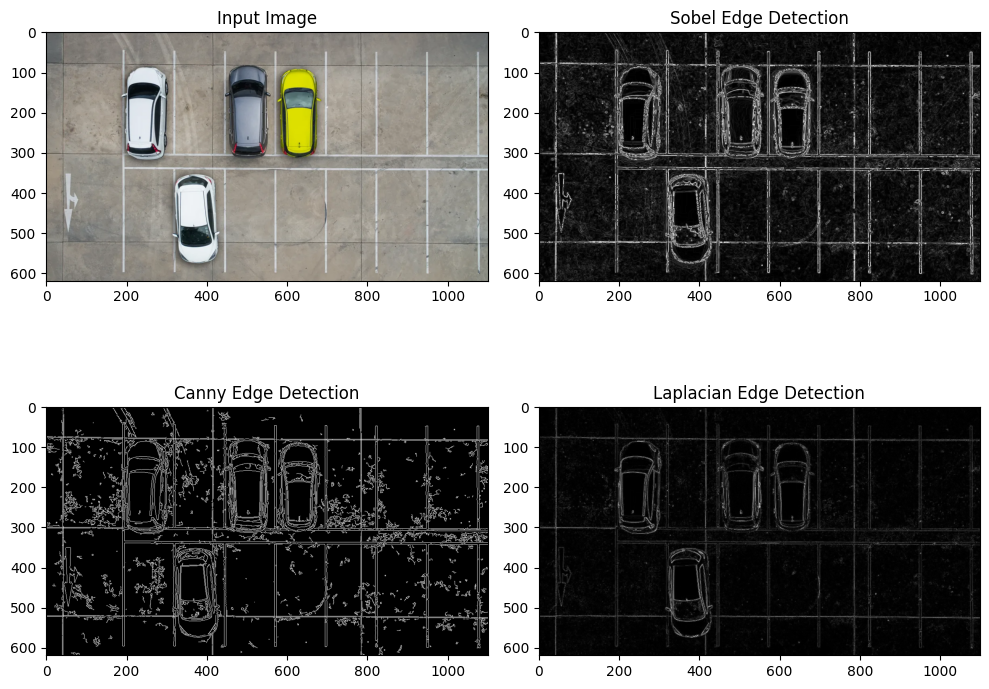

In [7]:
gambar4 = cv.imread('/content/drive/MyDrive/images/Object Detection/car-park.jpg', cv.IMREAD_COLOR)
gambar4_rgb = cv.cvtColor(gambar4, cv.COLOR_BGR2RGB)

gambar4_gray = cv.cvtColor(gambar4, cv.COLOR_BGR2GRAY)

sobel = np.sqrt(cv.Sobel(gambar4_gray, cv.CV_64F, 1, 0, ksize=3)**2 + cv.Sobel(gambar4_gray, cv.CV_64F, 0, 1, ksize=3)**2).astype(np.uint8)
canny = cv.Canny(gambar4_gray, threshold1=30, threshold2=100)
laplacian = cv.convertScaleAbs(cv.Laplacian(gambar4_gray, cv.CV_64F))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.flatten()

ax[0].imshow(gambar4_rgb)
ax[0].set_title('Input Image')

ax[1].imshow(sobel, cmap='gray')
ax[1].set_title('Sobel Edge Detection')

ax[2].imshow(canny, cmap='gray')
ax[2].set_title('Canny Edge Detection')

ax[3].imshow(laplacian, cmap='gray')
ax[3].set_title('Laplacian Edge Detection')

for a in ax:
    a.axis('on')

plt.tight_layout()
plt.show()

##Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg.

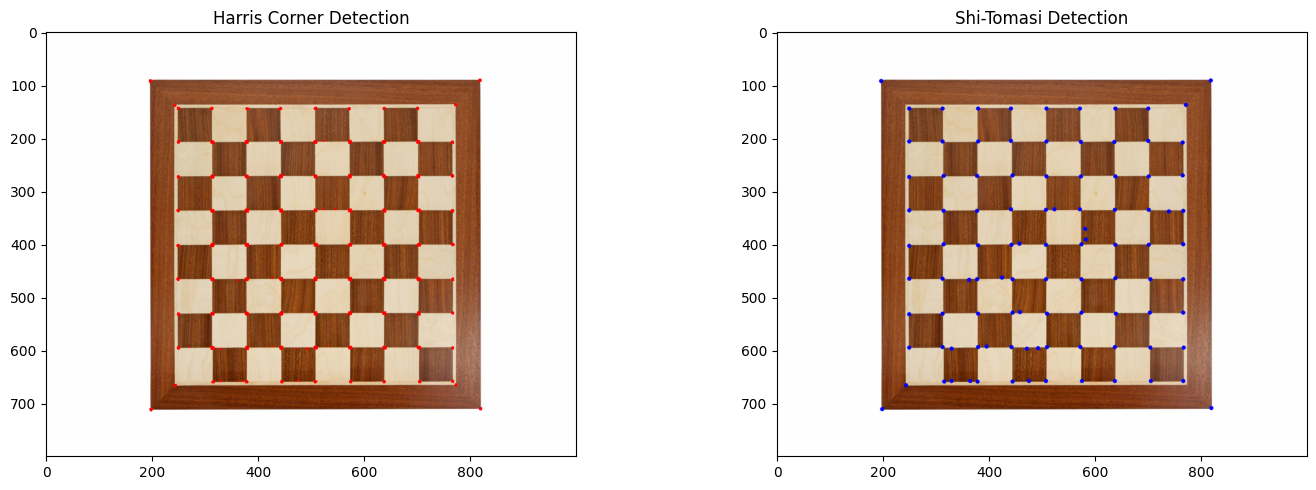

In [9]:
gambar5 = cv.imread('/content/drive/MyDrive/images/Object Detection/chess-board.jpg')
gambar5_gray = cv.cvtColor(gambar5, cv.COLOR_BGR2GRAY)

# harris corners detection
harris_corners = cv.cornerHarris(gambar5_gray, blockSize=4, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)
image_harris = cv.cvtColor(gambar5, cv.COLOR_BGR2RGB)
image_harris[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]

# shi-thomasi detection
corners = cv.goodFeaturesToTrack(gambar5_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)
image_shi_tomasi = cv.cvtColor(gambar5, cv.COLOR_BGR2RGB)
for corner in corners:
  x, y = corner.ravel()
  cv.circle(image_shi_tomasi, (x, y), 4, (0, 0, 255), -1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, (title, gambar5) in enumerate(zip(['Harris Corner Detection', 'Shi-Tomasi Detection'],
 [image_harris, image_shi_tomasi])):
  axes[i].imshow(gambar5)
  axes[i].set_title(title)
  axes[i].axis('on')

plt.tight_layout()
plt.show()

##Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


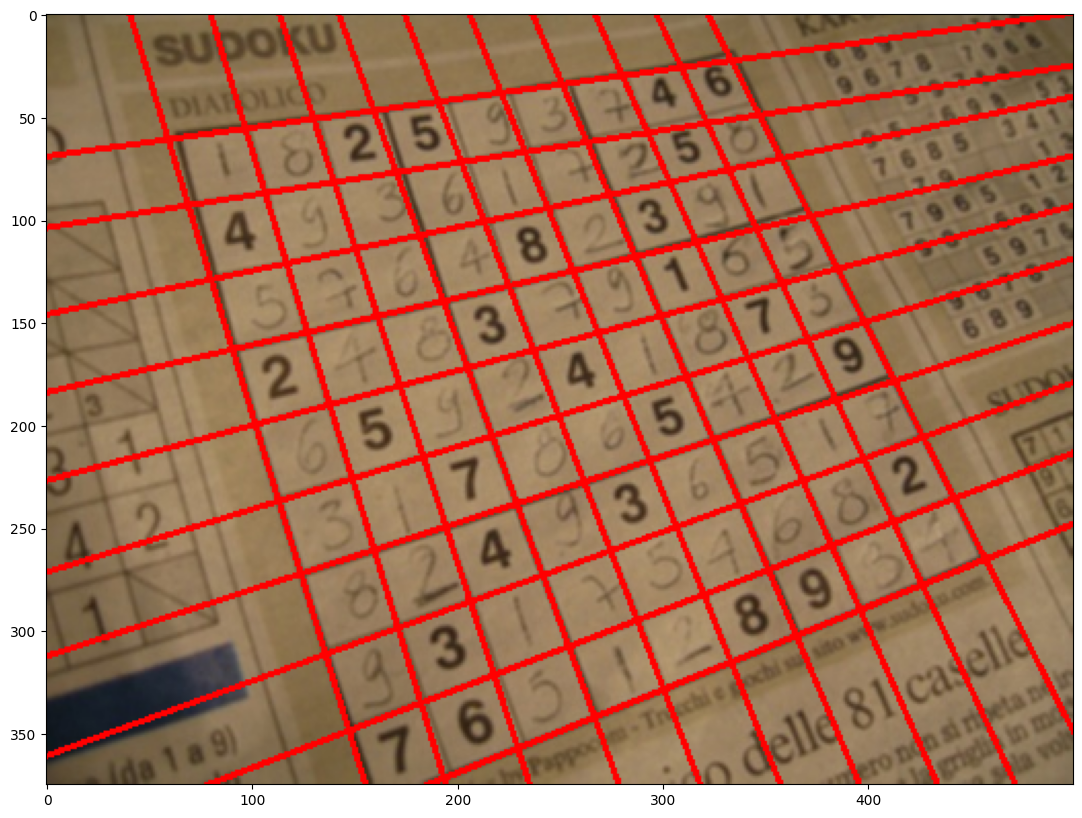

In [12]:
input_gambar = cv.imread('/content/drive/MyDrive/images/Object Detection/sudoku.jpg') 
gambar_gray = cv.cvtColor(input_gambar, cv.COLOR_BGR2GRAY)

edges = cv.Canny (gambar_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(input_gambar, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10)) 
    plt.imshow(cv.cvtColor(input_gambar, cv.COLOR_BGR2RGB))

##Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

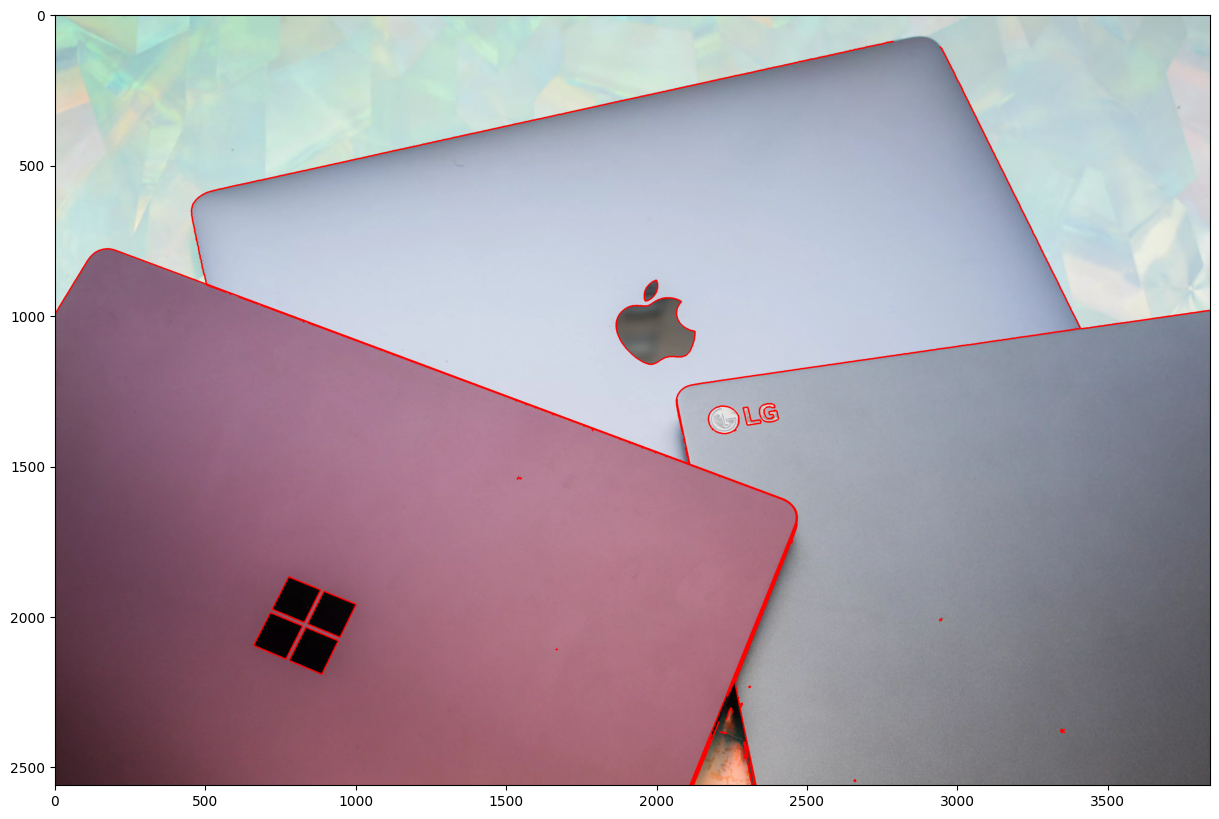

In [13]:
gambar = cv.imread('/content/drive/MyDrive/images/Object Detection/laptop.jpg') 
gambar_gray = cv.cvtColor(gambar, cv.COLOR_BGR2GRAY)

edged = cv.Canny(gambar_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(gambar, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(gambar, cv.COLOR_BGR2RGB))